In [51]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [2]:
df_gold = pd.read_csv("G:\Code_clause\Gold price Prediction\dataset\gld_price_data.csv") 

In [3]:
df_gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


DATE : represent specific date and time(2008 to 2018).<br>
SPX  : S&P 500 index, represent the performance of 500 publicly large companies in United States.<br>
GLD  : represents the price of Gold.<br>
USO  : represents united states oil fund.
SLV  : reprsents an ishare silver trust,that tracks the price of silver.<br>
EUR/DSO : exchange rate between EURO and Unitesd state dollar.<br>

In [4]:
df_gold.shape

(2290, 6)

In [6]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


CONCLUSION : there is non-null value means there is no missing value.

In [7]:
df_gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame
df_gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
#correlation between data
# ---> positive co relation
# ---> negative corelation
corelation = df_gold.corr()
corelation

C:\Users\Lakshya\AppData\Local\Temp\ipykernel_12560\2521444252.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = df_gold.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot: >

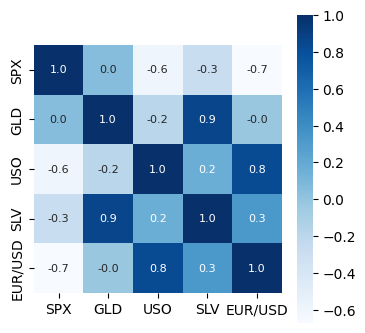

In [24]:
# heatmap to understand corelation 
plt.figure(figsize=(4,4))
sns.heatmap(corelation,cbar=True,square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Conclusion: frome above heatmap, GLD(gold) and SLV(silver) are positive corelated with corelation to <b>0.9</b>

C:\Users\Lakshya\AppData\Local\Temp\ipykernel_12560\2643560921.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gold['GLD'],color='BLUE')


<AxesSubplot: xlabel='GLD', ylabel='Density'>

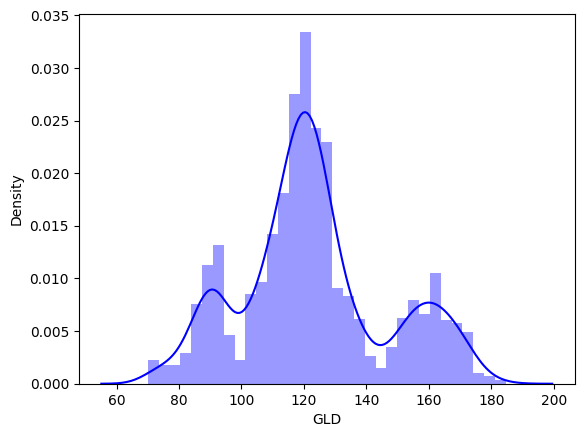

In [25]:
sns.distplot(df_gold['GLD'],color='BLUE')

Splitting the features and target

In [33]:
df_gold.drop(['Date'],axis=1,inplace=True)

In [37]:
x = df_gold['GLD']
y = df_gold.drop(['GLD'],axis=1)

In [38]:
x

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

Train-Test splitting


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state=2)

Model : Random forest regressor

In [42]:
x_train

476     109.879997
1958    115.540001
248      90.930000
2231    125.370003
1325    119.889999
           ...    
1071    169.610001
433     109.800003
674     129.869995
1099    159.429993
1608    115.139999
Name: GLD, Length: 1832, dtype: float64

In [43]:
y_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [40]:
regressor = RandomForestRegressor(n_estimators=100)

In [47]:
regressor.fit(y_train,x_train)

RandomForestRegressor()

model evaluation

In [50]:
prediction = regressor.predict(y_test)
prediction

array([168.50359971,  82.00209989, 116.0707001 , 127.49980028,
       120.85640141, 154.85039764, 150.03389828, 126.08570077,
       117.63869875, 125.96860114, 116.86010068, 171.5858011 ,
       141.92039904, 167.75399898, 115.22700019, 117.67530038,
       138.9948027 , 169.91790104, 159.51670339, 159.53549919,
       155.15470006, 125.12079988, 175.90780009, 157.2316042 ,
       125.20370085,  93.87889979,  76.47590056, 120.95719996,
       119.1026994 , 167.49350005,  88.24610046, 125.1563001 ,
        91.24090063, 117.58260031, 121.04829923, 137.16700034,
       115.40020151, 115.33290051, 148.90459945, 107.06820098,
       105.03460248,  87.21319792, 126.47120068, 117.82430012,
       153.61759963, 119.50960017, 108.34100005, 107.82409807,
        93.21760078, 127.22889714,  74.74900033, 113.66809892,
       121.44679982, 111.02359885, 118.87499916, 120.83539914,
       158.64050014, 168.20150132, 146.8833969 ,  85.55659833,
        94.27290036,  86.85269869,  90.57990012, 119.17

In [56]:
# r square value
err = metrics.r2_score(x_test,prediction)
err


0.9895380258904565